<a href="https://colab.research.google.com/github/JaehwanKim00/Toyproject_2024_2nd/blob/main/Apple_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 첫 번째 모델링

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader.data as web # 주가 데이터
import datetime # 날짜



# DataReader([종목정보],[데이터소스],[시작일],[종료일])
data = pd.read_csv('/content/drive/MyDrive/toyproject_apple/aapl_us_d.csv')
data['Date'] = pd.to_datetime(data['Date'])
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [ ]:
data.loc[6386:]

,Date,Open,High,Low,Close,Volume
6386,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
6387,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
6388,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
6389,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
6390,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
...,...,...,...,...,...,...
10075,2024-08-30,230.19000,230.40000,227.48000,229.00000,5.299077e+07
10076,2024-09-03,228.55000,229.00000,221.17000,222.77000,5.019057e+07
10077,2024-09-04,221.66000,221.78000,217.48000,220.85000,4.384020e+07
10078,2024-09-05,221.62500,225.48000,221.52000,222.38000,3.661540e+07


In [ ]:
data = data.loc[6386:]
data.head()

,Date,Open,High,Low,Close,Volume
6386,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
6387,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
6388,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
6389,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
6390,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [ ]:
data = data['Close'][data['Volume'] != 0]

In [ ]:
data.head()

,Close
6386,6.51522
6387,6.52639
6388,6.42221
6389,6.41085
6390,6.45401


In [ ]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

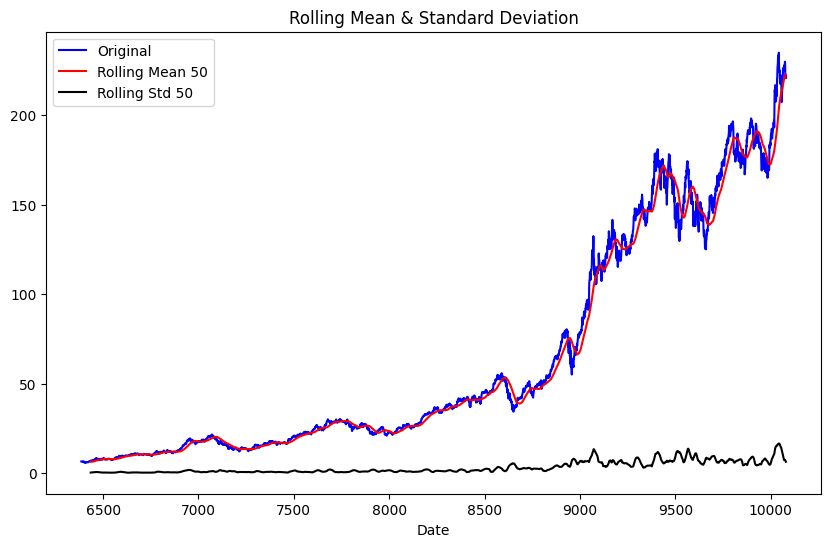

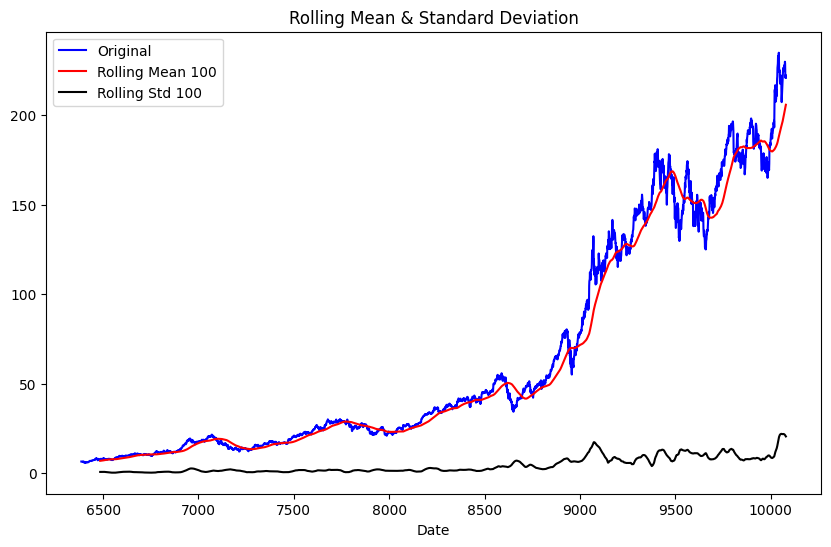

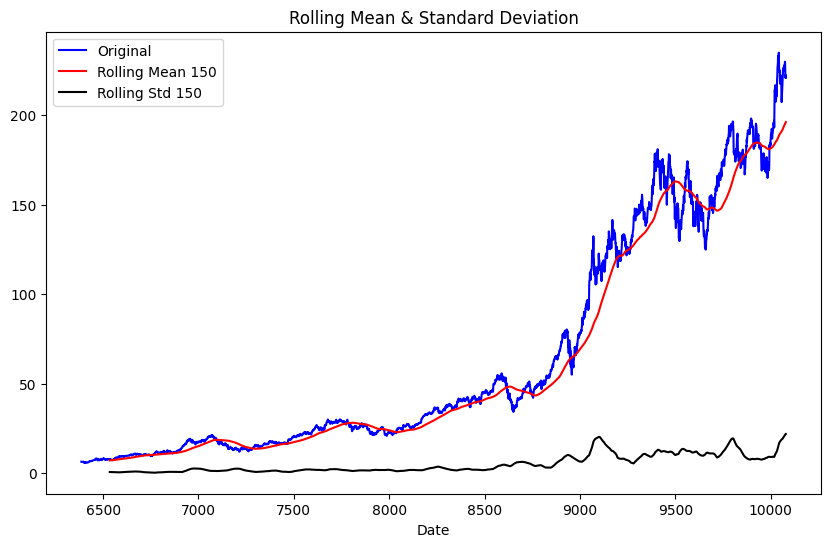

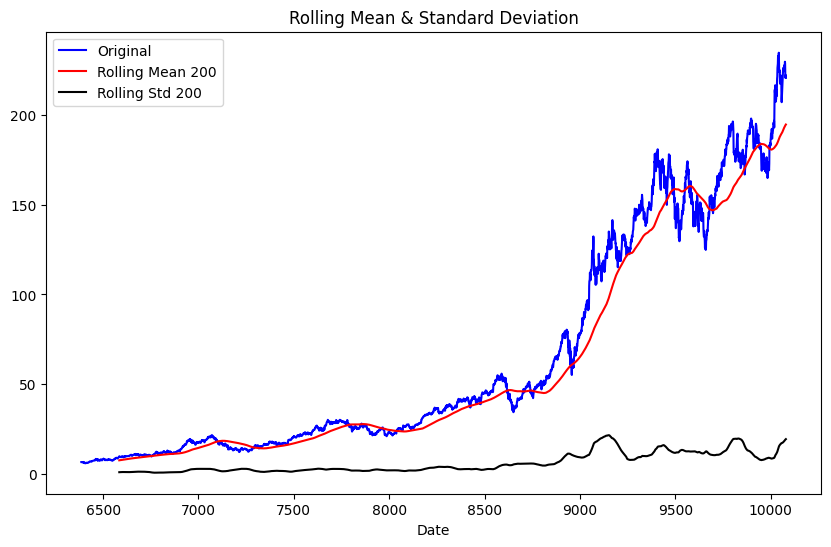

In [ ]:
# 50일치 평균내어 이동평균계산
plot_rolling(data, 50)
plot_rolling(data,100)
plot_rolling(data,150)
plot_rolling(data,200)

In [ ]:
# p-value > 0.05 이므로 귀무가설을 기각할 수 없음.
# 따라서 Apple 주식 데이터는 비정상성 데이터
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(data)

ADF TEST 결과
ADF Statistics: 1.028881
p-value: 0.994562
num of lags: 19.000000
num of observations: 3674.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


ADF TEST 결과
ADF Statistics: -13.295620
p-value: 0.000000
num of lags: 18.000000
num of observations: 3674.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


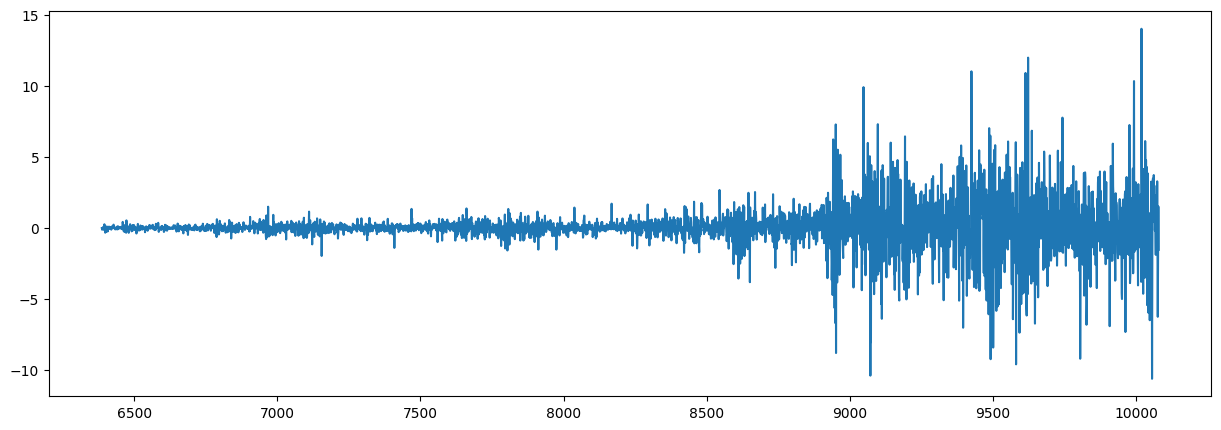

In [ ]:
# 1차 차분 데이터 diff1
dff1 = data.diff().dropna()
dff1.plot(figsize=(15,5))

# 차분 테이터 adf테스트
print('ADF TEST 결과')
adf_test(dff1)
#  비정상성 데이터는 차분을 이용하여 안정적으로 만들어 분석

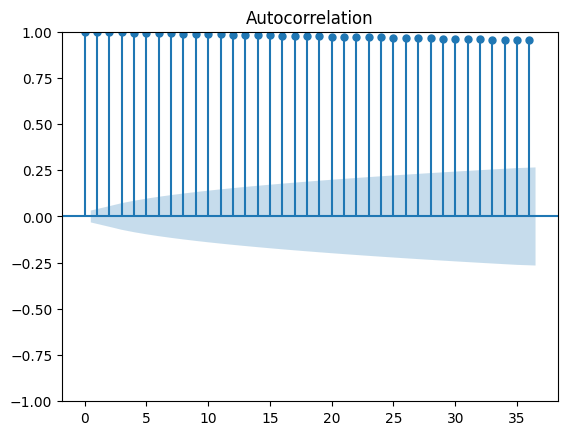

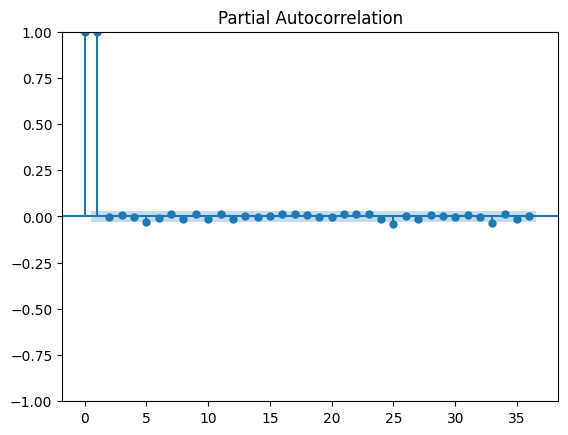

In [ ]:
# 원본 데이터 ACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plot_pacf(data)
plt.show()
# AR(1) 모델을 활용하는 것이 가장 적절

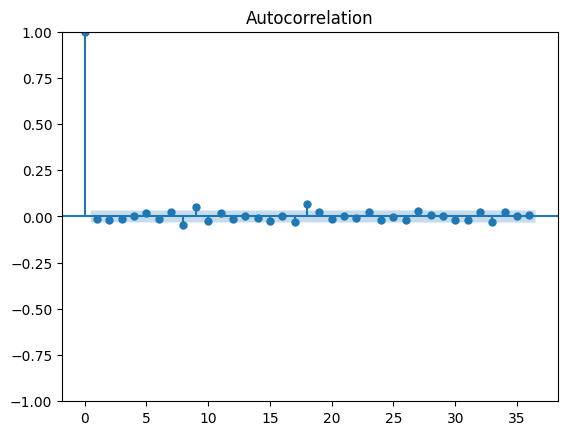

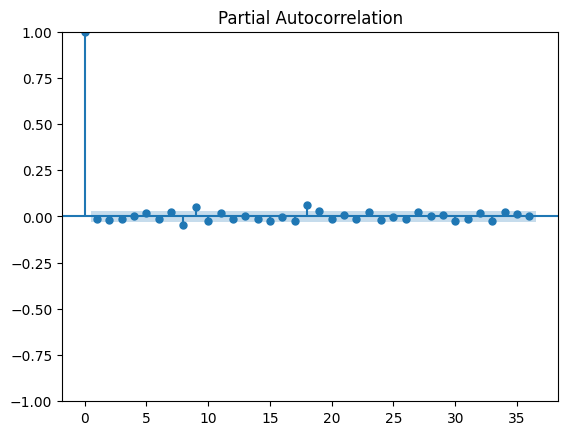

In [ ]:
# 차분한 데이터 ACF 그래프
plot_acf(dff1)
plot_pacf(dff1)
plt.show()

In [ ]:
data

,Close
6386,6.51522
6387,6.52639
6388,6.42221
6389,6.41085
6390,6.45401
...,...
10075,229.00000
10076,222.77000
10077,220.85000
10078,222.38000


In [ ]:
# 차분 결정
!pip install pmdarima
import pmdarima as pm
from pmdarima.arima import ndiffs
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}") # 결과
# 추정된 차수 1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00
추정된 차수 d = 1


In [ ]:
model = pm.auto_arima(
            y=data,
            d=1,
            start_p=0, max_p=3,
            start_q=0, max_q=3,
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13772.880, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13773.917, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13773.878, Time=1.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13775.983, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13774.541, Time=4.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.791 seconds


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3694
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6884.440
Date:                Sat, 21 Sep 2024   AIC                          13772.880
Time:                        01:39:01   BIC                          13785.309
Sample:                             0   HQIC                         13777.304
                               - 3694                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0580      0.026      2.258      0.024       0.008       0.108
sigma2         2.4363      0.022    110.943      0.000       2.393       2.479
Ljung-Box (L1) (Q):                   0.96   Jarque-

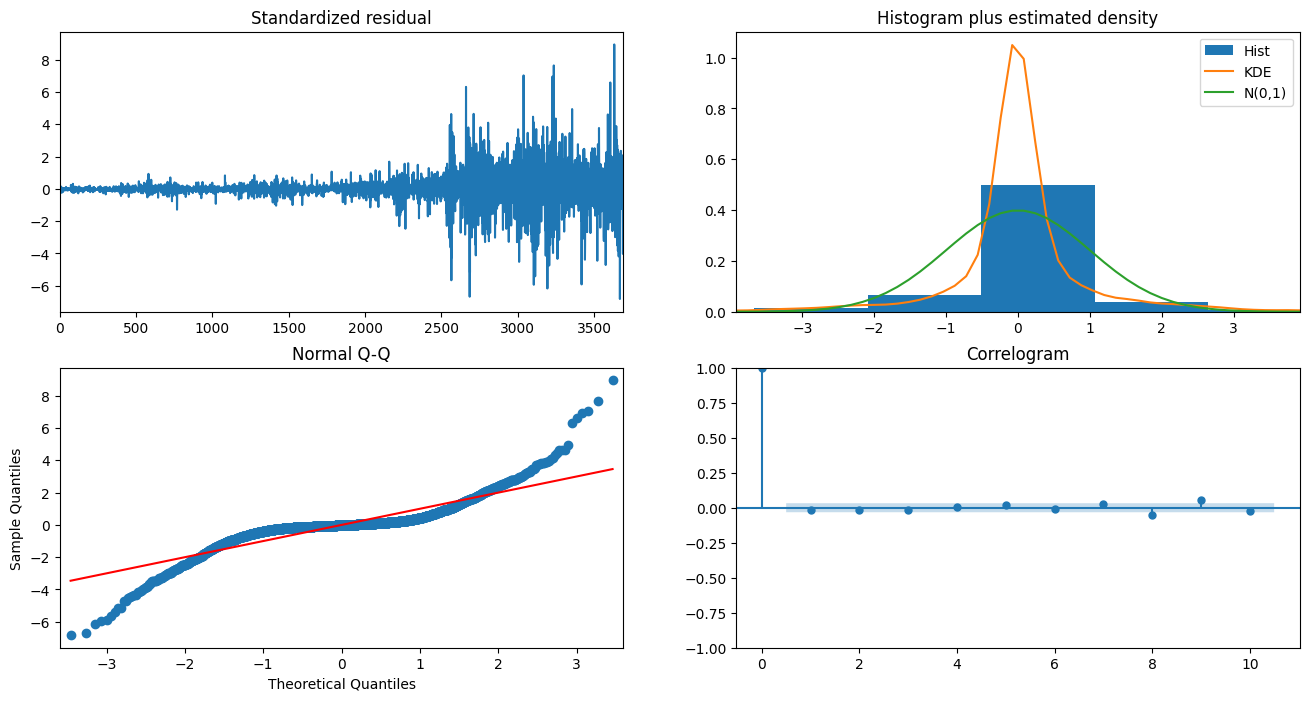

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
n_diffs

1

In [ ]:
# train : test = 0.9 : 0.1
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

from statsmodels.tsa.arima_model import ARIMA

model_fit = pm.auto_arima(
    	    y=train_data,
 	        d=n_diffs ,
            start_p=0, max_p=2,
            start_q=0, max_q=2,
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11710.398, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11703.033, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11702.453, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11711.741, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11701.126, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11702.845, Time=3.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11701.645, Time=0.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11702.225, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11703.220, Time=0.49 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 25.564 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 

In [ ]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


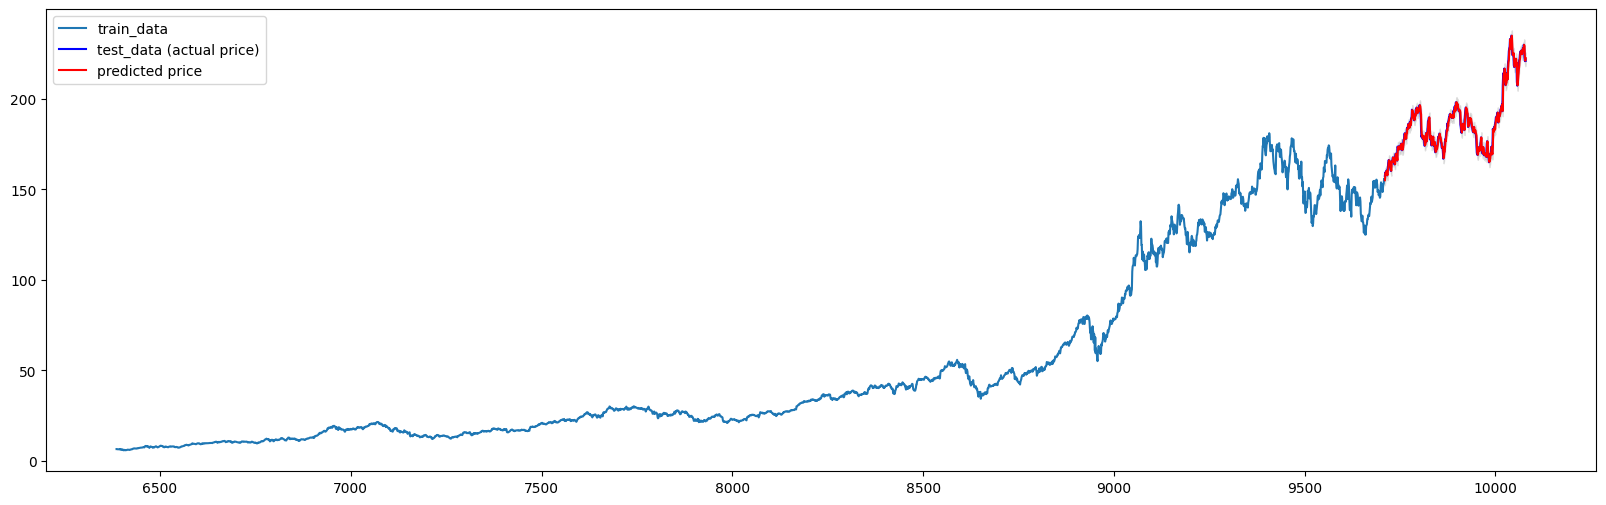

In [ ]:
# Forecast
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data = test_data)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))
# 9:1
# MSE:  3.227680682024234e+201
# MAE:  5.039264322186322e+99
# RMSE:  5.681268064459055e+100
# MAPE:  13939.06%

# 8:2
# MSE:  1.441996402440988e+201
# MAE:  2.4593889005765006e+99
# RMSE:  3.797362772294725e+100
# MAPE:  3200842988.43%

# 0.95:0.05
# MSE:  6.649135822394924e+201
# MAE:  1.0144955195084316e+100
# RMSE:  8.154223336648883e+100
# MAPE:  21124.88%

MSE:  3.9149253812970077e+201
MAE:  6.07307213351426e+99
RMSE:  6.256936455883988e+100
MAPE:  16534.41%


In [ ]:
test_data

,Close
9710,157.40
9711,159.28
9712,157.83
9713,158.93
9714,160.25
...,...
10075,229.00
10076,222.77
10077,220.85
10078,222.38


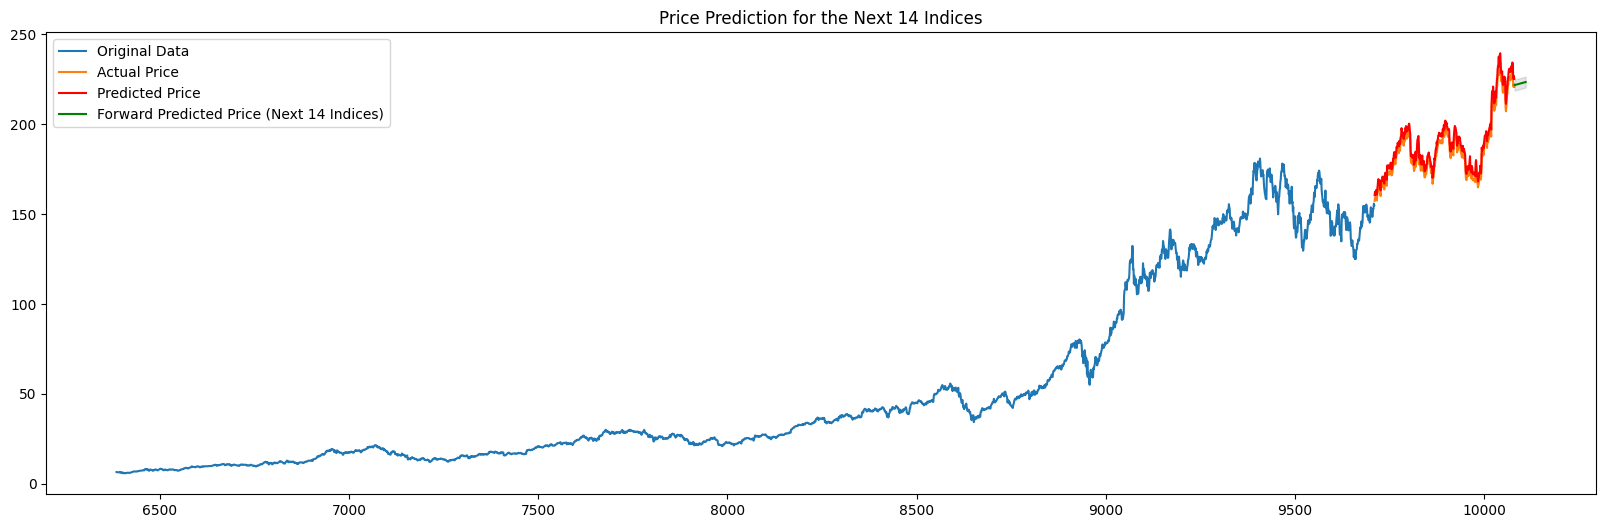

10080    221.831017
10081    221.889040
10082    221.947062
10083    222.005084
10084    222.063105
10085    222.121127
10086    222.179148
10087    222.237169
10088    222.295190
10089    222.353211
10090    222.411232
10091    222.469253
10092    222.527273
10093    222.585294
10094    222.643315
10095    222.701336
10096    222.759357
10097    222.817378
10098    222.875398
10099    222.933419
10100    222.991440
10101    223.049460
10102    223.107481
10103    223.165502
10104    223.223522
10105    223.281543
10106    223.339564
10107    223.397584
10108    223.455605
10109    223.513625
dtype: float64


In [ ]:
last_index = 10079

# 미래 14개 인덱스 생성
future_indices = range(last_index + 1, last_index + 31)

# 예측 결과 계산
fc2, upper2, lower2 = forecast(len(future_indices), model_fit, future_indices)

# 예측 결과 시뮬레이션 (실제 사용 시 forecast 함수를 사용하여 fc2, upper2, lower2를 계산)
fc = test_data.copy() * 1.02  # 임시 예측 결과
fc2 = pd.Series(fc2, index=future_indices)  # 미래 30개 인덱스에 대한 예측 결과
upper = fc * 1.05
lower = fc * 0.95
upper2 = pd.Series(upper2, index=future_indices)  # 미래 30개 인덱스에 대한 상한 바운드
lower2 = pd.Series(lower2, index=future_indices)  # 미래 30개 인덱스에 대한 하한 바운드

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, train_data, label='Original Data')
plt.plot(test_data.index, test_data, label='Actual Price')
plt.plot(test_data.index, fc, color='r', label='Predicted Price')
plt.plot(future_indices, fc2, color='g', label='Forward Predicted Price (Next 14 Indices)')
plt.fill_between(future_indices, lower2, upper2, color='k', alpha=.10)
plt.title('Price Prediction for the Next 14 Indices')
plt.legend(loc='upper left')
plt.show()

print(fc2)

In [ ]:
future_indices

range(10080, 10110)

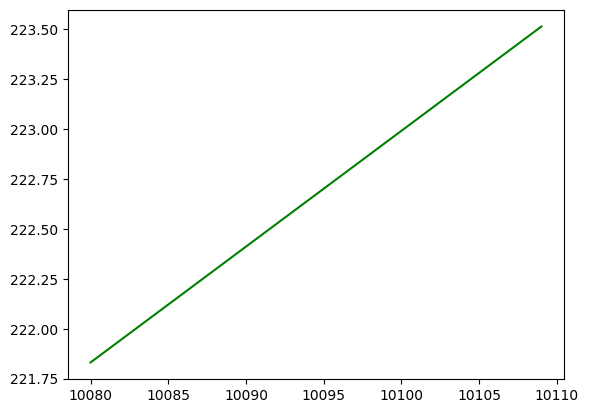

In [ ]:
plt.plot(future_indices, fc2, color='g', label='Forward Predicted Price (Next 14 Indexes)')

In [ ]:
test_data

# 두 번째 모델링(이거 사용 안 함)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
from pmdarima.arima import auto_arima

import seaborn as sns
plt.style.use('seaborn-whitegrid')
import itertools
import warnings
warnings.filterwarnings('ignore')
# DataReader([종목정보],[데이터소스],[시작일],[종료일])
data = pd.read_csv('/content/drive/MyDrive/toyproject_apple/aapl_us_d.csv')
data['Date'] = pd.to_datetime(data['Date'])
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [ ]:
df = data.loc[5630:]
df.head()

,Date,Open,High,Low,Close,Volume
5630,2007-01-03,2.62669,2.63586,2.49269,2.55082,1.452531e+09
5631,2007-01-04,2.56258,2.61682,2.55122,2.60744,9.938056e+08
5632,2007-01-05,2.61313,2.62390,2.56937,2.58970,9.791699e+08
5633,2007-01-08,2.61762,2.63446,2.59648,2.60236,9.344793e+08
5634,2007-01-09,2.63287,2.83046,2.59269,2.81771,3.927899e+09


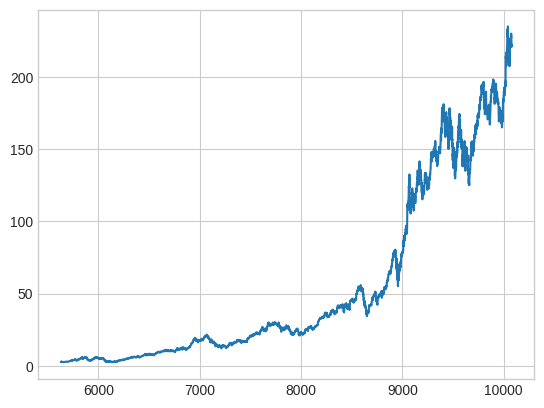

In [ ]:
fig = df['Close'].plot()

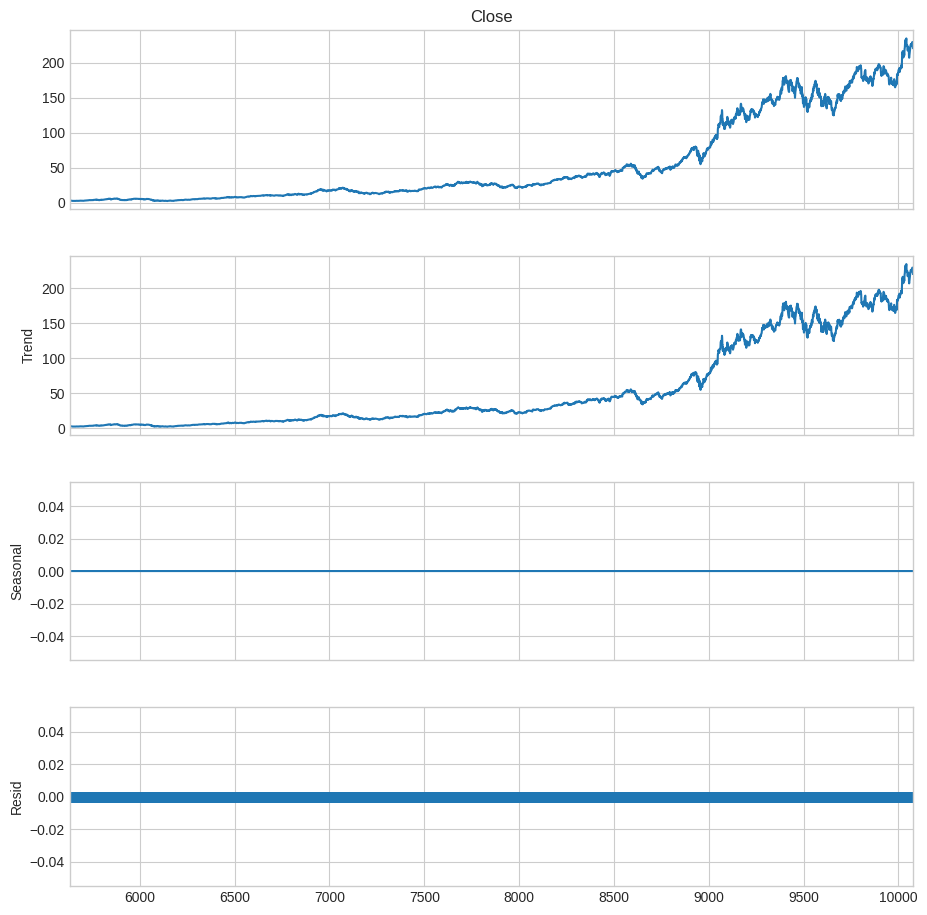

In [ ]:
# Decompostion
# decompostion이란, 시계열 데이터를 시계열 4요소(추세, 순환, 계절, 불규칙)으로 분해하는 기법
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

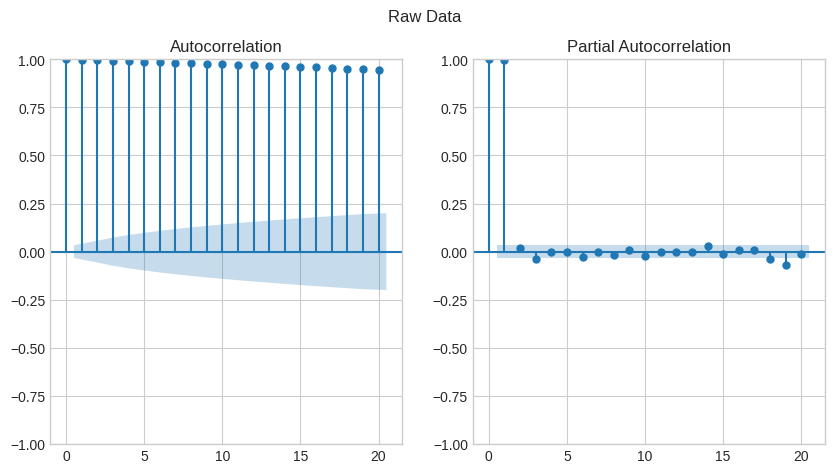

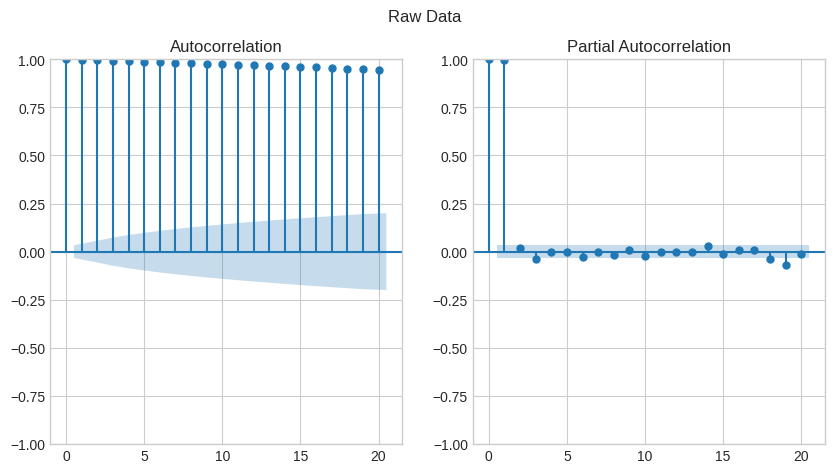

In [ ]:
# ACF,PACF
# split 8 : 2
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)
# ACF, PACF plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data['Close'].values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data['Close'].values.squeeze(), lags=20, ax=ax[1])


In [ ]:
# Non stationary 하므로 차분 진행
# Non-stationary -> stationary 보정 (차분, difference)
# differencing
star = '*'
diff_train_data = train_data.copy()
diff_train_data = diff_train_data['Close'].diff() # 차분
diff_train_data = diff_train_data.dropna() # 차분 후 생기는 결측치 제거
print(f'{star*15}Raw data{star*15}')
print(train_data['Close'].head())
print(f'{star*15}Differenced data{star*15}')
print(diff_train_data.head())

***************Raw data***************
5630    2.55082
5631    2.60744
5632    2.58970
5633    2.60236
5634    2.81771
Name: Close, dtype: float64
***************Differenced data***************
5631    0.05662
5632   -0.01774
5633    0.01266
5634    0.21535
5635    0.13448
Name: Close, dtype: float64


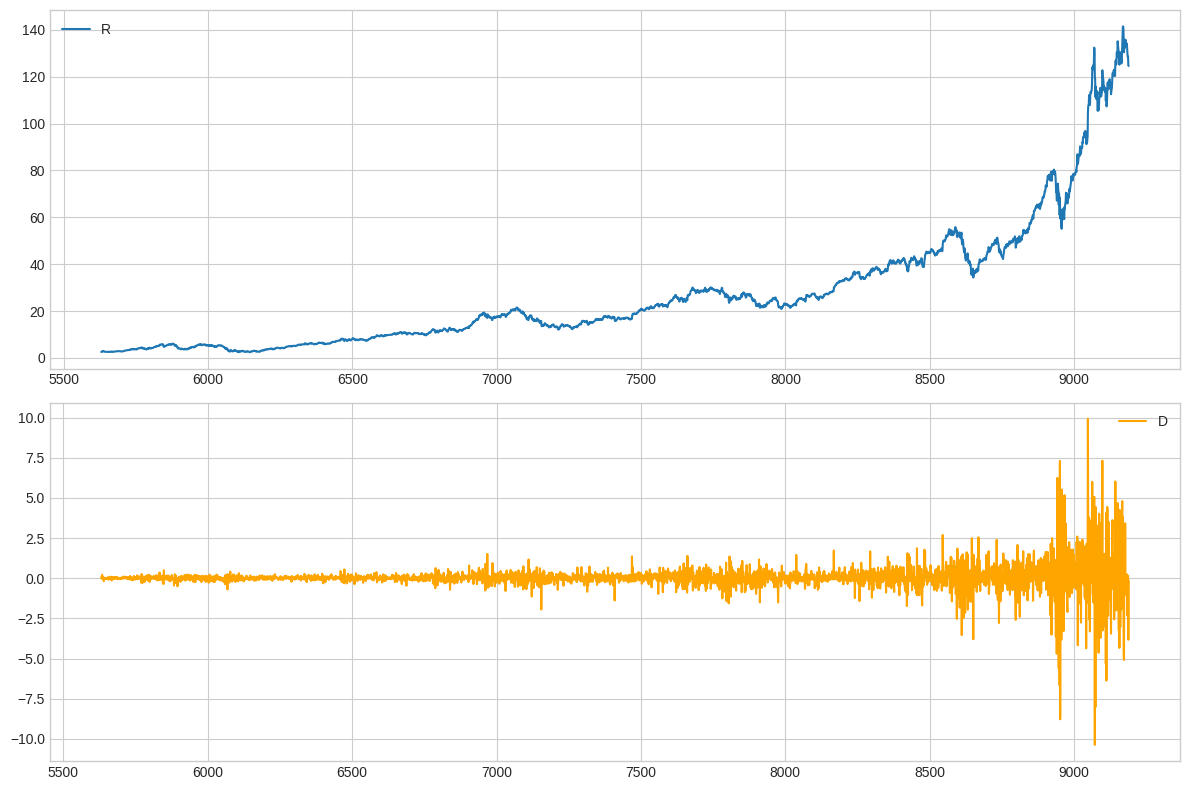

In [ ]:
# 차분 시각화

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(train_data['Close'])
ax1.legend('Raw data (Non-stationary)')

ax2.plot(diff_train_data, color='orange' )
ax2.legend('Differenced data (stationary)')


plt.tight_layout()
plt.show()

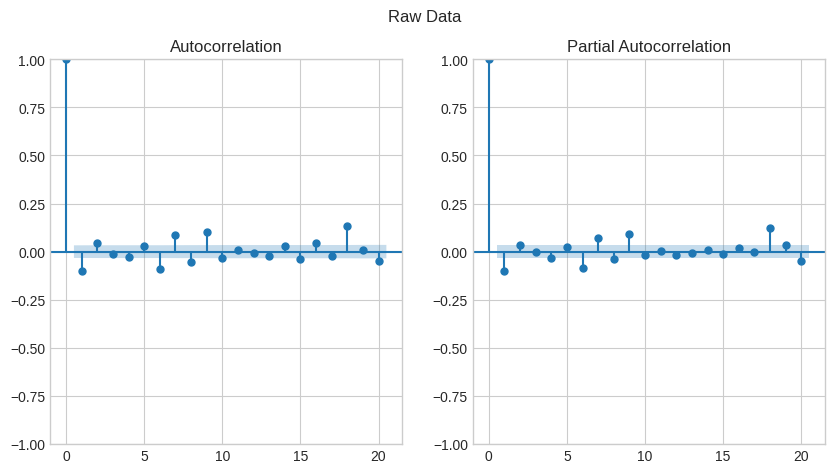

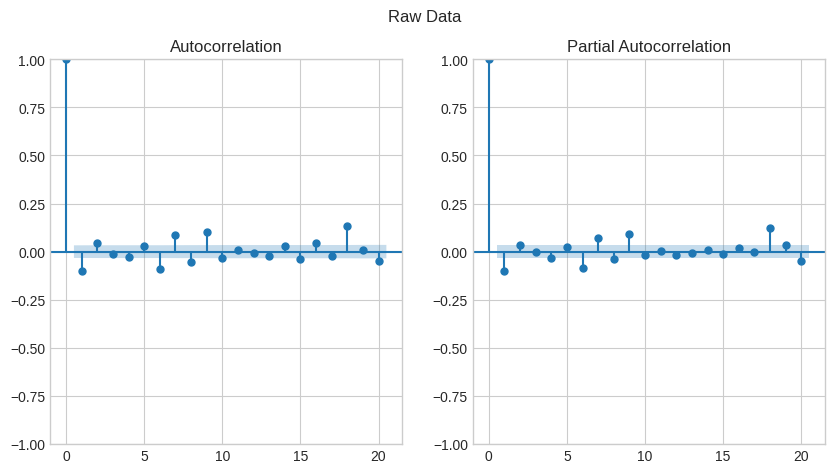

In [ ]:
# ACF, PACF plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=20, ax=ax[1])

In [ ]:
# 최적 파라미터 서치
from statsmodels.tsa.arima.model import ARIMA
p = range(0, 2)
d = range(1, 3)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq:
    model = ARIMA(train_data['Close'].values, order=i)
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))
# 가장 작은 AIC 파라미터 선택
# ARIMA pdq : (1, 2, 1) >> AIC : 8694.14

ARIMA pdq : (0, 1, 0) >> AIC : 8730.72
ARIMA pdq : (0, 1, 1) >> AIC : 8701.57
ARIMA pdq : (0, 2, 0) >> AIC : 11525.68
ARIMA pdq : (0, 2, 1) >> AIC : 8729.17
ARIMA pdq : (1, 1, 0) >> AIC : 8698.91
ARIMA pdq : (1, 1, 1) >> AIC : 8696.76
ARIMA pdq : (1, 2, 0) >> AIC : 10147.96
ARIMA pdq : (1, 2, 1) >> AIC : 8694.14


In [ ]:
# optimal paramter
optim = [(pdq[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print('Found Optimal Parameter :',optim)

Found Optimal Parameter : [((1, 2, 1), 8694.14)]


In [ ]:
model = ARIMA(train_data['Close'].values, order=(1, 2, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3560
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -4344.069
Date:                Thu, 19 Sep 2024   AIC                           8694.137
Time:                        16:57:09   BIC                           8712.668
Sample:                             0   HQIC                          8700.745
                               - 3560                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1020      0.005    -20.174      0.000      -0.112      -0.092
ma.L1         -0.9975      0.000  -2136.192      0.000      -0.998      -0.997
sigma2         0.6719      0.004    181.822      0.000       0.665       0.679
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            196664.65
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):             114.57   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecase with Arima
pred = model_fit.forecast(len(test_data))
pred_val = pred[0]
pred_ub = pred[2][:, 0]
pred_lb = pred[2][:, 1]
pred_index = list(test_data.index)
r2 = r2_score(test_data['Close'].values, pred_val)
fig, ax = plt.subplots(figsize=(12, 6))
df['Close'].plot(ax =ax)

ax.plot(pred_index, pred_val, label='Prediction')
ax.fill_between(pred_index, pred_lb, pred_ub, color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {optim[0][0]} Pred Result R^2 score : {round(r2, 2)}')
plt.show()

IndexError: invalid index to scalar variable.